In [1]:
import pandas as pd
import pprint as pp

In [2]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [8]:
df = pd.read_sql_table(table_name, engine)

2020-12-16 06:11:26,660 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-16 06:11:26,661 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 06:11:26,663 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-16 06:11:26,663 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 06:11:26,665 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-16 06:11:26,666 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 06:11:26,667 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-16 06:11:26,668 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 06:11:26,670 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-16 06:11:26,671 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 06:11:26,673 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNI

In [9]:
df = df.rename(columns={"class": "label"})

In [10]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [11]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [12]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [13]:
labels = model.predict(test.abstract)

In [14]:
pp.pprint(labels)

array(['10', '8', '8', '15', '4', '8', '14', '11', '8', '8', '8', '15',
       '14', '15', '8', '15', '15', '8', '8', '2', '11', '13', '8', '8',
       '8', '3', '15', '7', '12', '10', '8', '11', '8', '12', '11', '8',
       '8', '8', '3', '11', '7', '8', '6', '15', '10', '7', '8', '8',
       '13', '8', '15', '8', '13', '8', '8', '8', '9', '3', '15', '12',
       '8', '8', '8', '8', '8', '13', '3', '2', '2', '15', '14', '14',
       '3', '13', '10', '8', '8', '8', '8', '11', '14', '8', '15', '4',
       '15', '8', '10', '8', '8', '12', '13', '13', '8', '8', '8', '8',
       '8', '8', '15', '8', '7', '8', '8', '8', '15', '8', '6', '11', '3',
       '15', '8', '8', '8', '8', '8', '8', '13', '8', '8', '8', '11',
       '10', '8', '8', '11', '8', '11', '8', '8', '15', '15', '12', '14',
       '8', '15', '8', '8', '2', '8', '8', '8', '8', '8', '17', '8', '8',
       '12', '8', '12', '8', '15', '16', '14', '10', '15', '3', '8', '8',
       '8', '13', '8', '8', '11', '3', '11', '8', '15', '1

In [26]:
test.label

0        4
10      12
15       7
17       2
18       4
        ..
1501     6
1504    10
1505    15
1508    12
1524    12
Name: label, Length: 307, dtype: object

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels)

In [17]:
pp.pprint(mat)

array([[ 3,  3,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0, 13,  0],
       [ 0, 10,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  2,  7,  0,  2,  4,  0,  0,  0,  0,  0,  0,  0,  2,  8,  0],
       [ 0,  0,  0,  7,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  2,  0,  6,  3,  0,  1,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  0,  0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 15,  1],
       [ 0,  0,  0,  1,  2,  9,  0,  0,  6,  1,  0,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  1,  2,  0,  0,  2,  7,  0,  0,  0,  0,  5,  0],
       [ 1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0, 13,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  2,  0,  0,  4,  6,  0,  0,  0,  4,  0,  0,  3,  0,  6,  0],
       [ 2,  0,  1,  3,  0,  0,  0,  1,  0,  1,  0,

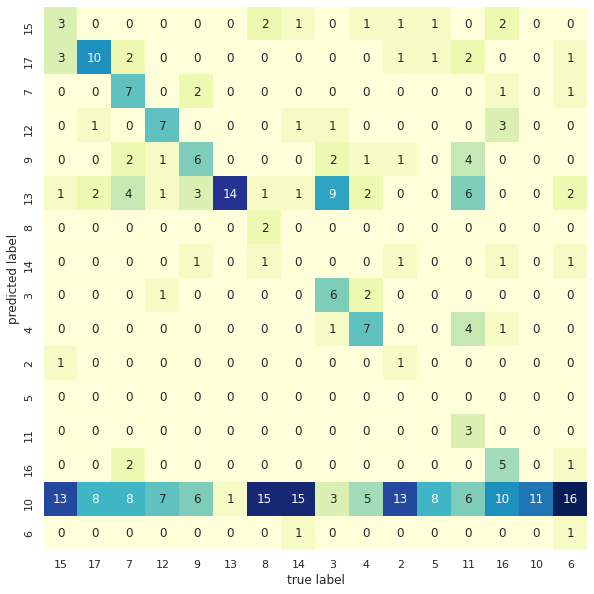

In [18]:
sns.set(style="white", color_codes=True)
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label');

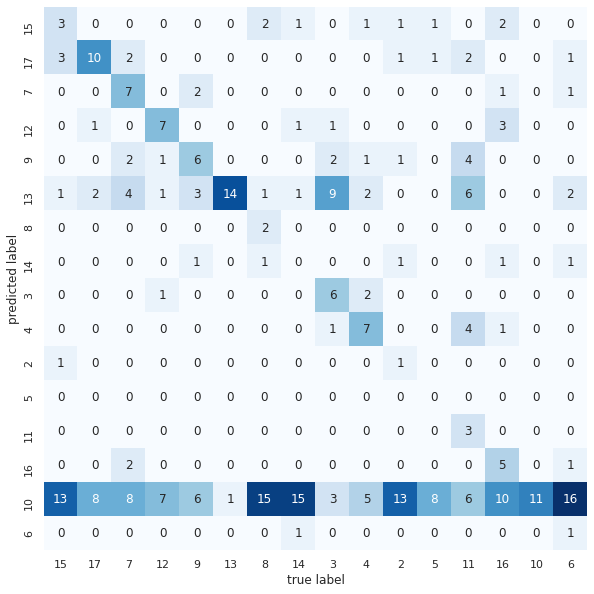

In [19]:
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="Blues")

plt.xlabel('true label')
plt.ylabel('predicted label');